<a href="https://colab.research.google.com/github/biranchi2018/Random_Forest/blob/master/Random_Forest_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest
https://www.dataspoof.info/post/understanding-random-forest-algorithm-and-implementation-in-python

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')

shuffle_index = np.random.permutation(df_train.shape[0])
df_train = df_train.iloc[shuffle_index]
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
52,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,167,...,0.0,0.0,0.0,0.0,0.0,182.0,255.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,190.0,190.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,204.0,119.0,0.0,0.0,0.0,0.0
690,8,0,0,0,0,0,0,0,0,0,0,3,2,0,70,20,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,241.0,239.0,228.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,132.0,164.0,159.0,151.0,151.0,146.0,129.0,101.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
736,1,0,0,0,0,0,0,0,0,0,0,141,153,130,137,109,127,117,133,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,...,255.0,247.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,170.0,96.0,0.0,0.0,90.0,176.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
885,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1102,1,0,0,0,0,0,0,0,0,0,0,148,113,98,83,34,101,89,101,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,254,...,252.0,229.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,151.0,112.0,0.0,0.0,9.0,158.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
len(df_train.columns)

785

In [11]:
df_train.isnull().count()

label       1413
pixel1      1413
pixel2      1413
pixel3      1413
pixel4      1413
            ... 
pixel780    1413
pixel781    1413
pixel782    1413
pixel783    1413
pixel784    1413
Length: 785, dtype: int64

In [0]:
df_train.fillna(0, inplace=True)

In [6]:
df_test = pd.read_csv('fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242.0,245.0,224.0,245.0,234.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,69.0,94.0,123.0,127.0,138.0,138.0,142.0,145.0,135.0,125.0,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248.0,238.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,233.0,155.0,0.0,65.0,235.0,216.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0.0,0.0,0.0,0.0,0.0,0.0,87.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,50.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255.0,255.0,254.0,252.0,255.0,101.0,196.0,254.0,252.0,100.0,0.0,0.0,0.0,0.0,0.0,168.0,232.0,225.0,0.0,41.0,172.0,147.0,148.0,153.0,155.0,146.0,137.0,141.0,143.0,137.0,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,69.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_test.fillna(0, inplace=True)

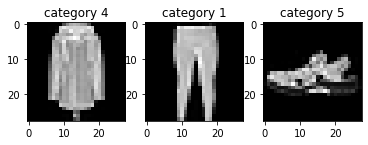

In [18]:
samples = np.random.randint(0, df_train.shape[0], 3)
for i, idx in enumerate(samples):
    sample = np.reshape(df_train.iloc[idx, 1:].values/255, (28, 28))
    plt.subplot(2, 3, i+1)
    plt.title('category {}'.format(df_train.iloc[idx, 0]))
    plt.subplots_adjust(top=1, bottom=0.1)
    plt.imshow(sample, 'gray')

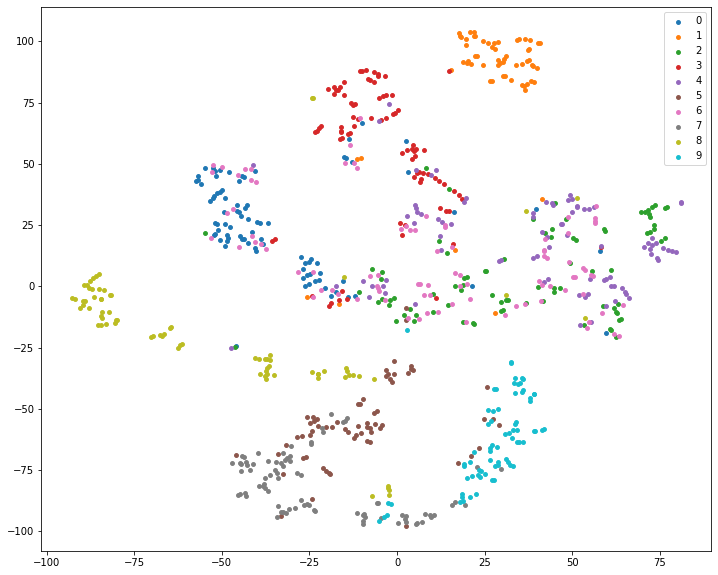

In [19]:
from sklearn.manifold import TSNE
X = df_train.iloc[:800, 1:]
y = df_train.iloc[:800, 0]


tsne = TSNE(n_components=2, random_state=0,
            perplexity=5, learning_rate=10, n_iter=5000)
X_2d = tsne.fit_transform(X)

target_ids = range(10)
colors = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',
          '#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']
          
# fig, ax = plt.subplots(figsize=(6, 6/1.2))

fig, ax = plt.subplots(figsize=(12, 10))
for i, c, label in zip(target_ids, colors, range(10)):
    ax.scatter(X_2d[y==i, 0], X_2d[y == i, 1],
               cmap="viridis", label=label, s=15)
    ax.legend()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

train_data, val_data = train_test_split(df_train.iloc[:, 1:], test_size=0.2, random_state=42)
train_data, val_data = train_data/255, val_data/255 # normalize training and validation data
train_label, val_label = train_test_split(df_train.iloc[:, 0], test_size=0.2, random_state=42)

test_data = df_test.iloc[:, 1:]
test_label = df_test.iloc[:, 0]
test_data /= 255 # normalize test data


train_label_cat = to_categorical(train_label)
val_label_cat = to_categorical(val_label)
test_label_cat = to_categorical(test_label)

Using TensorFlow backend.


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_depth = 50, 
                                criterion='entropy', n_jobs=-1)
clf.fit(train_data, train_label_cat)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
label_names = ['Class-{}'.format(i) for i in range(1, 11)]

y_pred_rf = clf.predict(test_data)

def sparse_matrix_vec(mat):
    n, m = mat.shape
    vec = np.zeros(n)
    for i in range(n):
        for j in range(m):
            if mat[i, j]:
                vec[i] = j
    return vec

y_pred_rf_vec = sparse_matrix_vec(y_pred_rf)

# correct = np.nonzero(test_label == y_pred_rf_vec)[0]
# wrong = np.nonzero(test_label != y_pred_rf_vec)[0]

print(y_pred_rf_vec.shape , test_label.shape)

correct = np.nonzero(np.array(test_label) == np.array(y_pred_rf_vec))
wrong = np.nonzero(np.array(test_label) != np.array(y_pred_rf_vec))


print(classification_report(test_label, y_pred_rf_vec, target_names=label_names))
print(accuracy_score(test_label, y_pred_rf_vec))

(2832,) (2832,)
              precision    recall  f1-score   support

     Class-1       0.30      0.95      0.46       278
     Class-2       1.00      0.89      0.94       266
     Class-3       0.82      0.53      0.65       281
     Class-4       0.92      0.76      0.84       301
     Class-5       0.75      0.47      0.58       280
     Class-6       0.97      0.80      0.88       289
     Class-7       0.79      0.26      0.39       293
     Class-8       0.89      0.83      0.86       264
     Class-9       0.98      0.86      0.92       281
    Class-10       0.90      0.87      0.89       299

    accuracy                           0.72      2832
   macro avg       0.83      0.72      0.74      2832
weighted avg       0.83      0.72      0.74      2832

0.7217514124293786


## XGBoost Classifier

In [0]:
# !pip install xgboost

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier

params = {"loss":"deviance",
          "max_depth":10,
          "n_estimators":100}

xgb_clf = XGBClassifier(**params) 
xgb_clf.fit(train_data, train_label)

params2 = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}
 
xgb_clf.get_params()
y_pred_xgb = xgb_clf.predict(test_data)
y_pred_xgb[:5]

correct = np.nonzero(np.array(test_label) == np.array(y_pred_xgb))[0]
wrong = np.nonzero(np.array(test_label) != np.array(y_pred_xgb))[0]

print(classification_report(test_label, y_pred_xgb, target_names=label_names))
print(accuracy_score(test_label, y_pred_xgb))

              precision    recall  f1-score   support

     Class-1       0.76      0.74      0.75       278
     Class-2       0.97      0.91      0.94       266
     Class-3       0.67      0.72      0.70       281
     Class-4       0.81      0.87      0.84       301
     Class-5       0.72      0.74      0.73       280
     Class-6       0.94      0.85      0.89       289
     Class-7       0.60      0.55      0.58       293
     Class-8       0.86      0.86      0.86       264
     Class-9       0.92      0.93      0.93       281
    Class-10       0.86      0.93      0.89       299

    accuracy                           0.81      2832
   macro avg       0.81      0.81      0.81      2832
weighted avg       0.81      0.81      0.81      2832

0.8096751412429378
